# Recent College Graduates - BIOS512 Final Project


In [1]:
library(tidyverse)
data = read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv")
print(data)
data %>% head()

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Parsed with column specification:
cols(
  .default = col_double(),
  Major = col_character(),
  Major_category = col_character()
)

See spec(...) for full column specifications.



# A tibble: 173 x 21
    Rank Major_code Major Total   Men Women Major_category ShareWomen
   <dbl>      <dbl> <chr> <dbl> <dbl> <dbl> <chr>               <dbl>
 1     1       2419 PETR…  2339  2057   282 Engineering         0.121
 2     2       2416 MINI…   756   679    77 Engineering         0.102
 3     3       2415 META…   856   725   131 Engineering         0.153
 4     4       2417 NAVA…  1258  1123   135 Engineering         0.107
 5     5       2405 CHEM… 32260 21239 11021 Engineering         0.342
 6     6       2418 NUCL…  2573  2200   373 Engineering         0.145
 7     7       6202 ACTU…  3777  2110  1667 Business            0.441
 8     8       5001 ASTR…  1792   832   960 Physical Scie…      0.536
 9     9       2414 MECH… 91227 80320 10907 Engineering         0.120
10    10       2408 ELEC… 81527 65511 16016 Engineering         0.196
# … with 163 more rows, and 13 more variables: Sample_size <dbl>,
#   Employed <dbl>, Full_time <dbl>, Part_time <dbl>,
#   Full_time_year_

Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,⋯,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2419,PETROLEUM ENGINEERING,2339,2057,282,Engineering,0.1205643,36,1976,⋯,270,1207,37,0.01838053,110000,95000,125000,1534,364,193
2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0.1018519,7,640,⋯,170,388,85,0.11724138,75000,55000,90000,350,257,50
3,2415,METALLURGICAL ENGINEERING,856,725,131,Engineering,0.1530374,3,648,⋯,133,340,16,0.02409639,73000,50000,105000,456,176,0
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258,1123,135,Engineering,0.1073132,16,758,⋯,150,692,40,0.05012531,70000,43000,80000,529,102,0
5,2405,CHEMICAL ENGINEERING,32260,21239,11021,Engineering,0.3416305,289,25694,⋯,5180,16697,1672,0.06109771,65000,50000,75000,18314,4440,972
6,2418,NUCLEAR ENGINEERING,2573,2200,373,Engineering,0.1449670,17,1857,⋯,264,1449,400,0.17722641,65000,50000,102000,1142,657,244


In [2]:
major_cat = data %>% group_by(Major_category) %>% count() %>% arrange(desc(n))
major_cat

Major_category,n
<chr>,<int>
Engineering,29
Education,16
Humanities & Liberal Arts,15
Biology & Life Science,14
Business,13
Health,12
Computers & Mathematics,11
Agriculture & Natural Resources,10
Physical Sciences,10


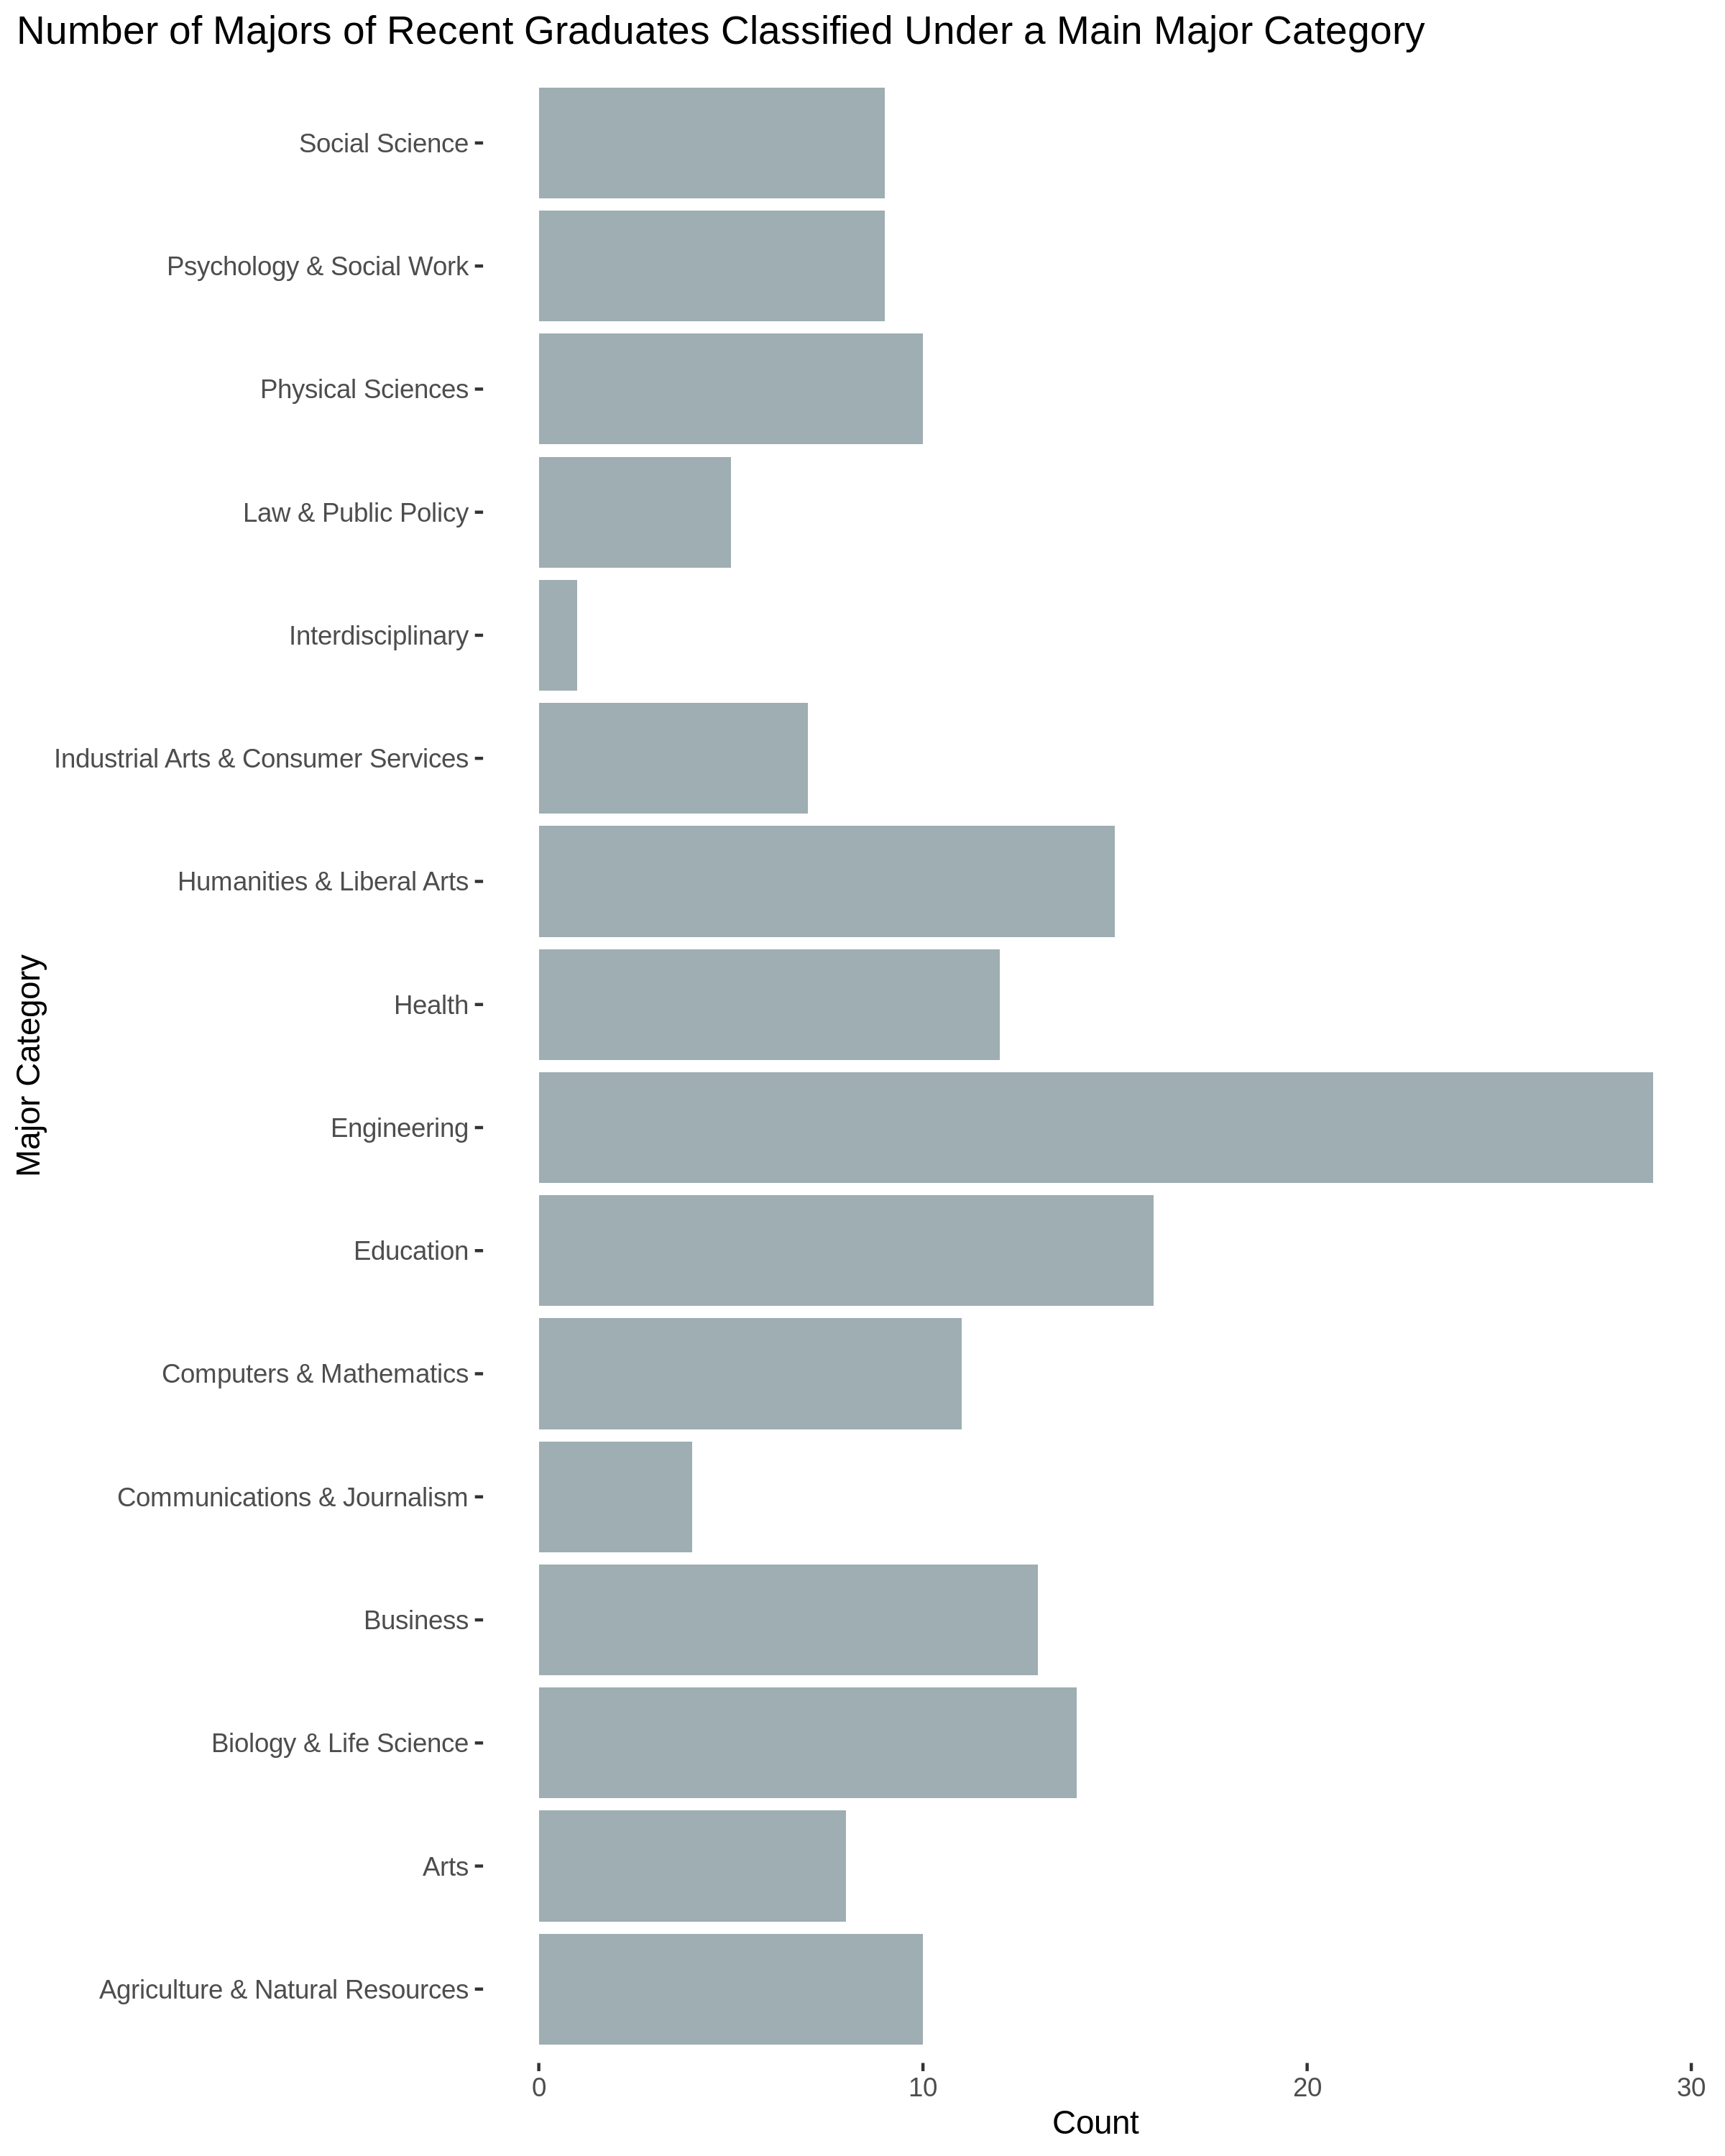

In [3]:
options(repr.plot.width = 8, repr.plot.height = 10, repr.plot.res = 300)
major_cat_plot = ggplot(data, aes(y=Major_category, fill="#9EAEB2")) + geom_bar() + 
                theme(plot.title.position="plot", legend.position="none",  panel.grid.major = element_blank(),
                    panel.grid.minor = element_blank(),
                    panel.border = element_blank(),
                    panel.background = element_blank()) + 
                labs(title="Number of Majors of Recent Graduates Classified Under a Main Major Category", y="Major Category", x="Count") + 
                scale_fill_manual(values=c('#9EAEB2'))
major_cat_plot

In [4]:
major_cat_num = data %>% group_by(Major_category) %>% summarize(num_women = sum(Women, na.rm=TRUE), num_total = sum(Total, na.rm=TRUE)) 
major_cat_num

`summarise()` ungrouping output (override with `.groups` argument)



Major_category,num_women,num_total
<chr>,<dbl>,<dbl>
Agriculture & Natural Resources,35263,75620
Arts,222740,357130
Biology & Life Science,268943,453862
Business,634524,1302376
Communications & Journalism,260680,392601
Computers & Mathematics,90283,299008
Education,455603,559129
Engineering,129276,537583
Health,387713,463230


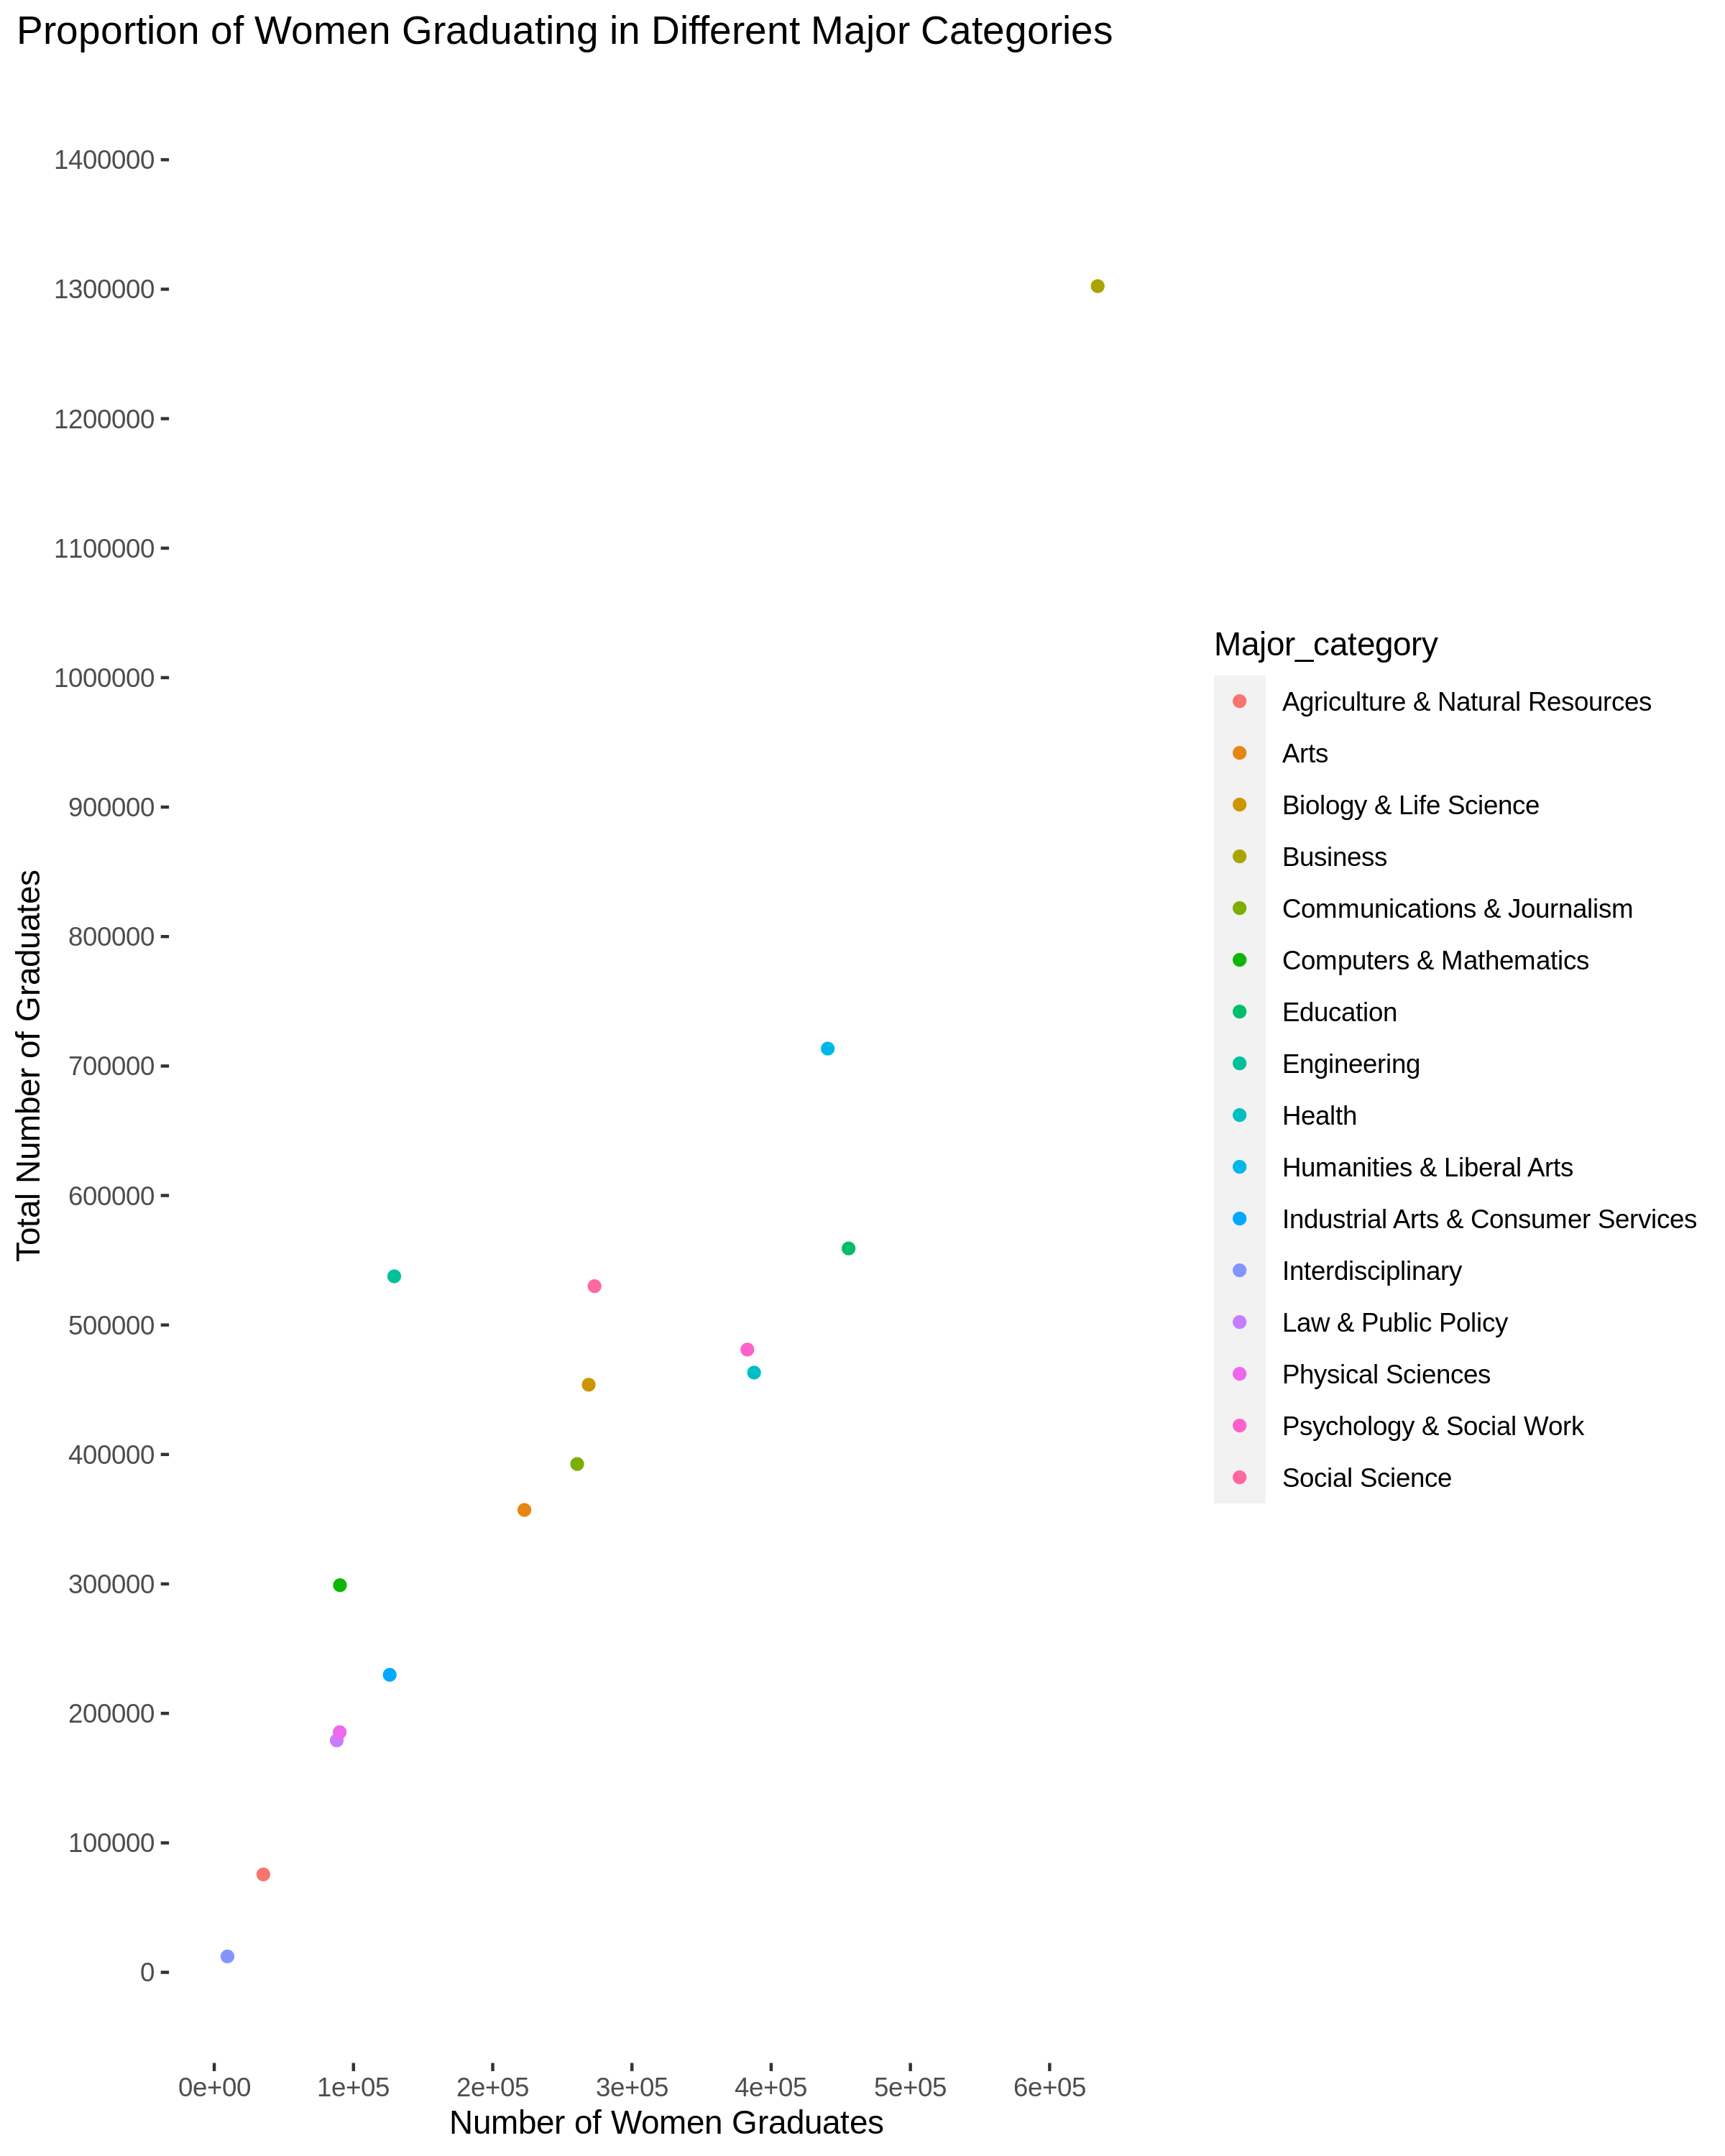

In [5]:
women_major_plot = ggplot(major_cat_num, aes(x=num_women, y=num_total, color=Major_category)) + geom_point() +
                    scale_y_continuous(limits=c(0,1400000), breaks = seq(0,1400000,by=100000)) +
                    scale_x_continuous(limits=c(0,650000), breaks = seq(0,650000,by=100000)) +
                    theme(plot.title.position="plot", panel.grid.major = element_blank(),
                    panel.grid.minor = element_blank(),
                    panel.border = element_blank(),
                    panel.background = element_blank()) + 
                labs(title="Proportion of Women Graduating in Different Major Categories", y="Total Number of Graduates", x="Number of Women Graduates")
women_major_plot

In [6]:
employed = data %>% group_by(Major_category) %>% summarize(num_employed = sum(Employed), num_unemployed = sum(Unemployed)) %>% mutate(employed_unemployed = num_employed + num_unemployed, unemployed_prop = num_unemployed/employed_unemployed)
employed

`summarise()` ungrouping output (override with `.groups` argument)



Major_category,num_employed,num_unemployed,employed_unemployed,unemployed_prop
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Agriculture & Natural Resources,66943,3824,70767,0.05403649
Arts,288114,28228,316342,0.08923254
Biology & Life Science,302797,22854,325651,0.07017943
Business,1088742,79877,1168619,0.06835162
Communications & Journalism,330660,26852,357512,0.07510797
Computers & Mathematics,237894,18373,256267,0.07169476
Education,479839,24969,504808,0.04946237
Engineering,420372,29817,450189,0.06623218
Health,372147,22213,394360,0.05632671


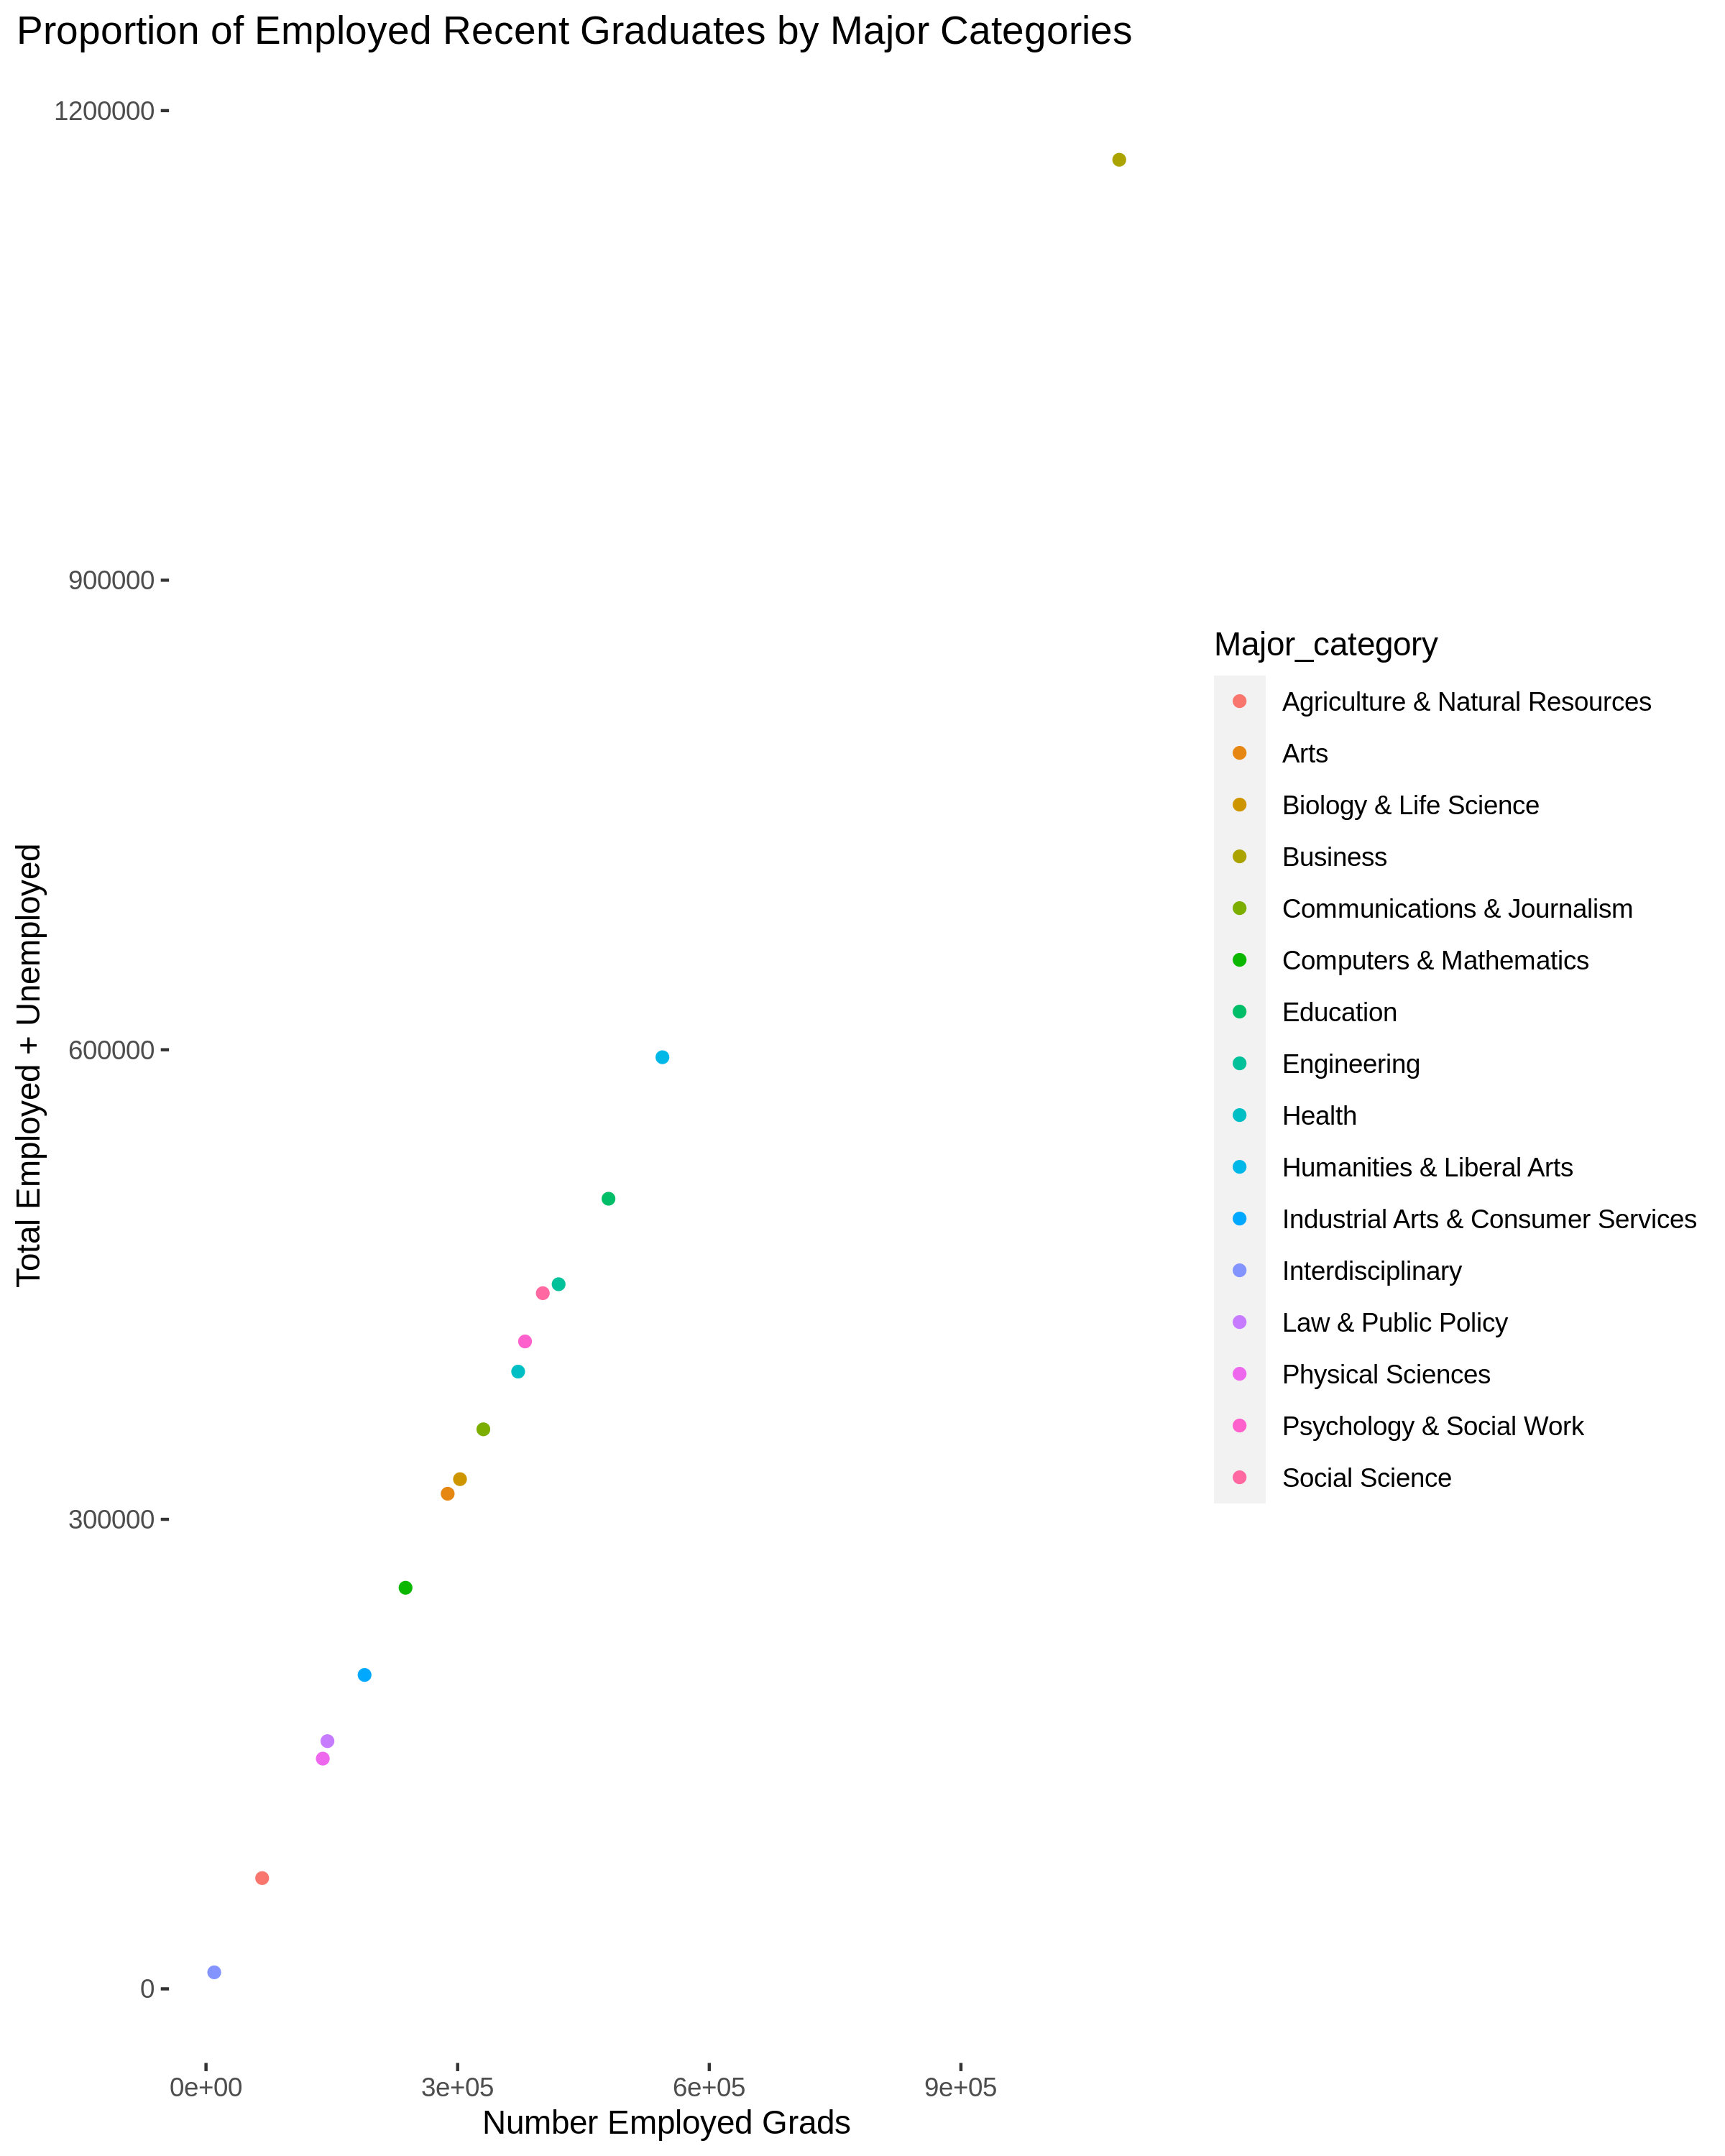

In [7]:
employed_plot = ggplot(employed, aes(x=num_employed, y=employed_unemployed, color=Major_category)) + geom_point() + 
        theme(plot.title.position="plot", panel.grid.major = element_blank(),
                    panel.grid.minor = element_blank(),
                    panel.border = element_blank(),
                    panel.background = element_blank()) + 
                labs(title="Proportion of Employed Recent Graduates by Major Categories", y="Total Employed + Unemployed", x="Number Employed Grads")
employed_plot

The dataset came from an economic guide to picking a college major taken from the American Community Survey 2010-2012 Public Use Microdata Series. The theme of the data is about the various college majors of recent graduates and breaksdown each major by sex, type of job, number employed or unemployed, and earnings. There are 173 different majors that recent graduates studied and received their degree in, of which those 173 majors were categorized into 16 main major categories. Engineering, with 29 majors, had the most amount of majors classified under it. On the otherhand, Interdisciplinary, with only 1 major, was the one that had the least number of majors under this category. Engineering seems to have various fields and allowed recent graduates to pick different engineering majors given the high number of majors. 

Given the multiple major groupings, business had the most total number of people (n=1302376) and women (n=634524) who majored in this category. As a result, business had the highest proportion of women to total number of graduates. Interdisciplinary had the smallest proportion, with the least total number of people (n=12296) and women (n=9479) majoring in this category. Similarly, business had the highest proportion of recent graduates who were employed, whereas interdisciplinary had the smallest proportion. Thus, from these findings, business, with 13 majors classified under it, seems to be a good safe choice and popular major category as recent graduates chose and are able to find a job given the high employment rate, with a moderate unemployment rate (0.06835162) compared to other categories. 